#  Maximum Matching Algorithm using Augmenting Path Algorithm

In [2]:
def maxMatching(X, Y, E):
    '''
    X - First partite set with vertices labeled with numbers
    Y - Second partite set with vertices labeled with numbers
    E - Edge set with unordered pairs from X and Y
    '''

    M = {}  # m[x] = y -> x matches with y
    S = [False] * len(X)
    marked = []

    # initialize all matches to null
    for x in X:
        M[x] = None

    max_matching_found = False

    while not max_matching_found:
        term = False

        for x in X:
            # Consider every unmarked x in X
            if x not in marked:
                # Find neighbours of x in Y from the edge set E
                ns = []
                for e in E:
                    if e[0] == x:
                        ns.append(e[1])
                    elif e[1] == x:
                        ns.append(e[0])

                for y in ns:
                    if M[x] != y and y not in M.values():
                        # For all neighbours of x, if y is unsaturated by M
                        # Then add xy to M and terminate this iteration

                        M[x] = y
                        term = True
                        break
                    else:
                        # If y is already saturated by M then it is already matched to some x
                        # so we add that to S
                        for i in range(len(X)):
                            if M[X[i]] == y:
                                S[i] = True
                                break

                marked.append(x)  # Mark x after x has been considered

            # Terminate current iteration
            if term:
                break

        # Once all x in X have been considered a maximum matching is found
        if len(marked) == len(X):
            max_matching_found = True

    # Return edges in the same format they were provided
    ret = []
    for x in X:
        if M[x] == None:
            del M[x]
        else:
            ret.append((x, M[x]))

    return ret

This algorithm uses the Augmenting Path Algorithm from 3.2.1 from Doublas B. West's book "Introduction to Graph Theory".

## Example

This graph is exampled in the algorithm and returns A similar result to the picture; there are many options for a maximum matching with the way the edges connect multiple nodes.

![Sample graph](Sample-graph.jpg)

In the example below, the above graph is represented as `V(X) = [0, 1, 2, 3, 4, 5, 6, 7, 8]` and `V(Y) = [9, 10, 11, 12, 13, 14, 15, 16]`

6 [(0, 9), (2, 10), (4, 11), (6, 12), (7, 13), (8, 14)]


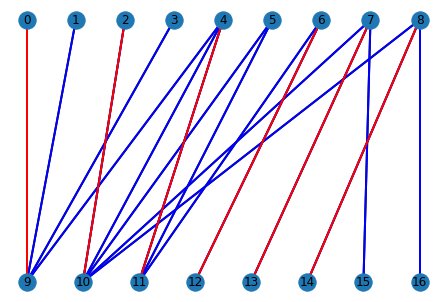

In [3]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8]
Y = [9, 10, 11, 12, 13, 14, 15, 16]
E = [(0, 9),
     (1, 9),
     (2, 10),
     (3, 9),
     (4, 9), (4, 10), (4, 11),
     (5, 10), (5, 11),
     (6, 11), (6, 12),
     (7, 10), (7, 13), (7, 15),
     (8, 10), (8, 14), (8, 16)]

M = maxMatching(X, Y, E)
print(len(M), M)
renderGraph(X, Y, E, M)

We see the same number of edges are found for the matching. The last three edges are the exact same, and the only option, as the example graph. The first three edges have some options since node 9, 10 and 11 are connected to many degree 1-3 nodes in X.

## Another Example

5 [(0, 15), (2, 16), (4, 17), (8, 18), (13, 19)]


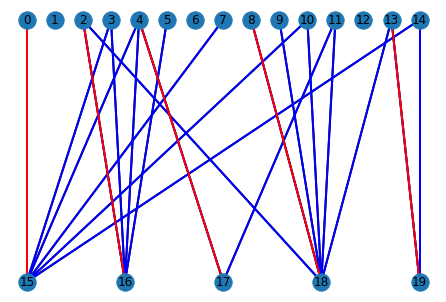

In [4]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Y = [15, 16, 17, 18, 19]
E = [(0, 15), (3, 15), (4, 15), (7, 15), (10, 15), (14, 15),
     (2, 16), (3, 16), (4, 16), (5, 16),
     (4, 17), (11, 17),
     (2, 18), (8, 18), (9, 18), (10, 18), (11, 18), (13, 18),
     (13, 19), (14, 19)]

M = maxMatching(X, Y, E)
print(len(M), M)
renderGraph(X, Y, E, M)

## Yet Another Example (complete biclique)

3 [(0, 4), (1, 5), (2, 6)]


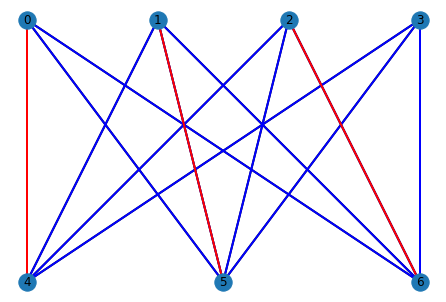

In [5]:
X = [0, 1, 2, 3]
Y = [4, 5, 6]
E = [(0, 4), (0, 5), (0, 6),
     (1, 4), (1, 5), (1, 6),
     (2, 4), (2, 5), (2, 6),
     (3, 4), (3, 5), (3, 6)]

M = maxMatching(X, Y, E)
print(len(M), M)
renderGraph(X, Y, E, M)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def renderGraph(X, Y, E, M):
    G = nx.Graph()
    G.add_nodes_from(X)
    G.add_nodes_from(Y)
    G.add_edges_from(E)
    
    p = nx.bipartite_layout(G, X, align="horizontal")
    ls = {}
    for i in range(len(X) + len(Y)):
        ls[i] = i
    
    nx.draw(G, pos=nx.bipartite_layout(G, X, align="horizontal"), with_labels=True, width=2)
    nx.draw_networkx_edges(G, edgelist=E, pos=p, width=2, edge_color='b')
    nx.draw_networkx_edges(G, edgelist=M, pos=p, width=2, edge_color='r')